In [2]:
import config
import src.data_preparation.patch_cutter as pc
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [3]:
def show_patch_on_raw_image(patch_filename):
    """
    Show the raw image with an annotated bounding box around the specified patch.

    Parameters:
    patch_filename (str): Filename of the patch (e.g., 'IMG_2242_p0.png').
    """
    # Extract the image number from the patch filename
    image_number = patch_filename.split('_p')[0]

    # Read metadata CSV to find the coordinates
    metadata_df = pd.read_csv(config.CANNABIS_PATCHES_METADATA_FILE)
    patch_metadata = metadata_df[metadata_df['patch_name'] == patch_filename].iloc[0]
    x, y = patch_metadata['x'], patch_metadata['y']

    # Find the week and zoom type for the image
    week, zoom_type = config.find_image_details(image_number)
    if not week or not zoom_type:
        print("Image details not found.")
        return

    # Get the path to the raw image
    raw_image_path = config.get_raw_image_path(week, zoom_type) / f"{image_number}.JPG"

    # Read the raw image
    raw_image = cv2.imread(str(raw_image_path))
    raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)  # Convert color to RGB

    # Calculate the bounding box
    bbox = [x, y, x + config.CANNABIS_PATCH_SIZE, y + config.CANNABIS_PATCH_SIZE]

    # Draw the bounding box on the image
    cv2.rectangle(raw_image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)

    # Display the image
    plt.imshow(raw_image)
    plt.title(f"Bounding Box on {image_number}")
    plt.show()


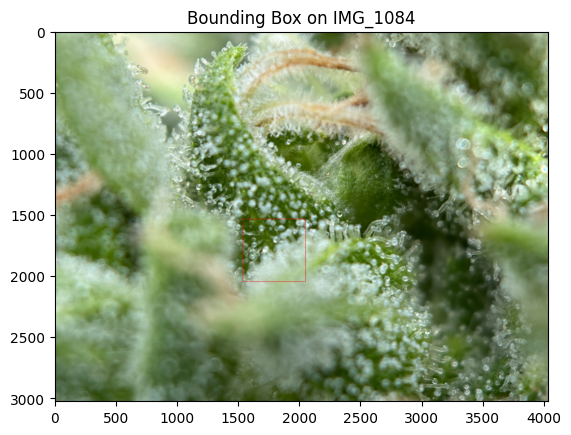

In [8]:
show_patch_on_raw_image("IMG_1084_p8.png")

In [34]:
def plot_patches(patches_with_coords, cols=8):
    num_patches = len(patches_with_coords)
    rows = num_patches // cols + (1 if num_patches % cols else 0)

    plt.figure(figsize=(20, 20))
    for i, (patch, _) in enumerate(patches_with_coords):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(patch)
        plt.axis('off')
    plt.show()
    
def read_and_plot_image(image_path, patch_size=512):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    patches_with_coords = pc.pad_and_cut_images(image, patch_size, patch_size)
    plot_patches(patches_with_coords)

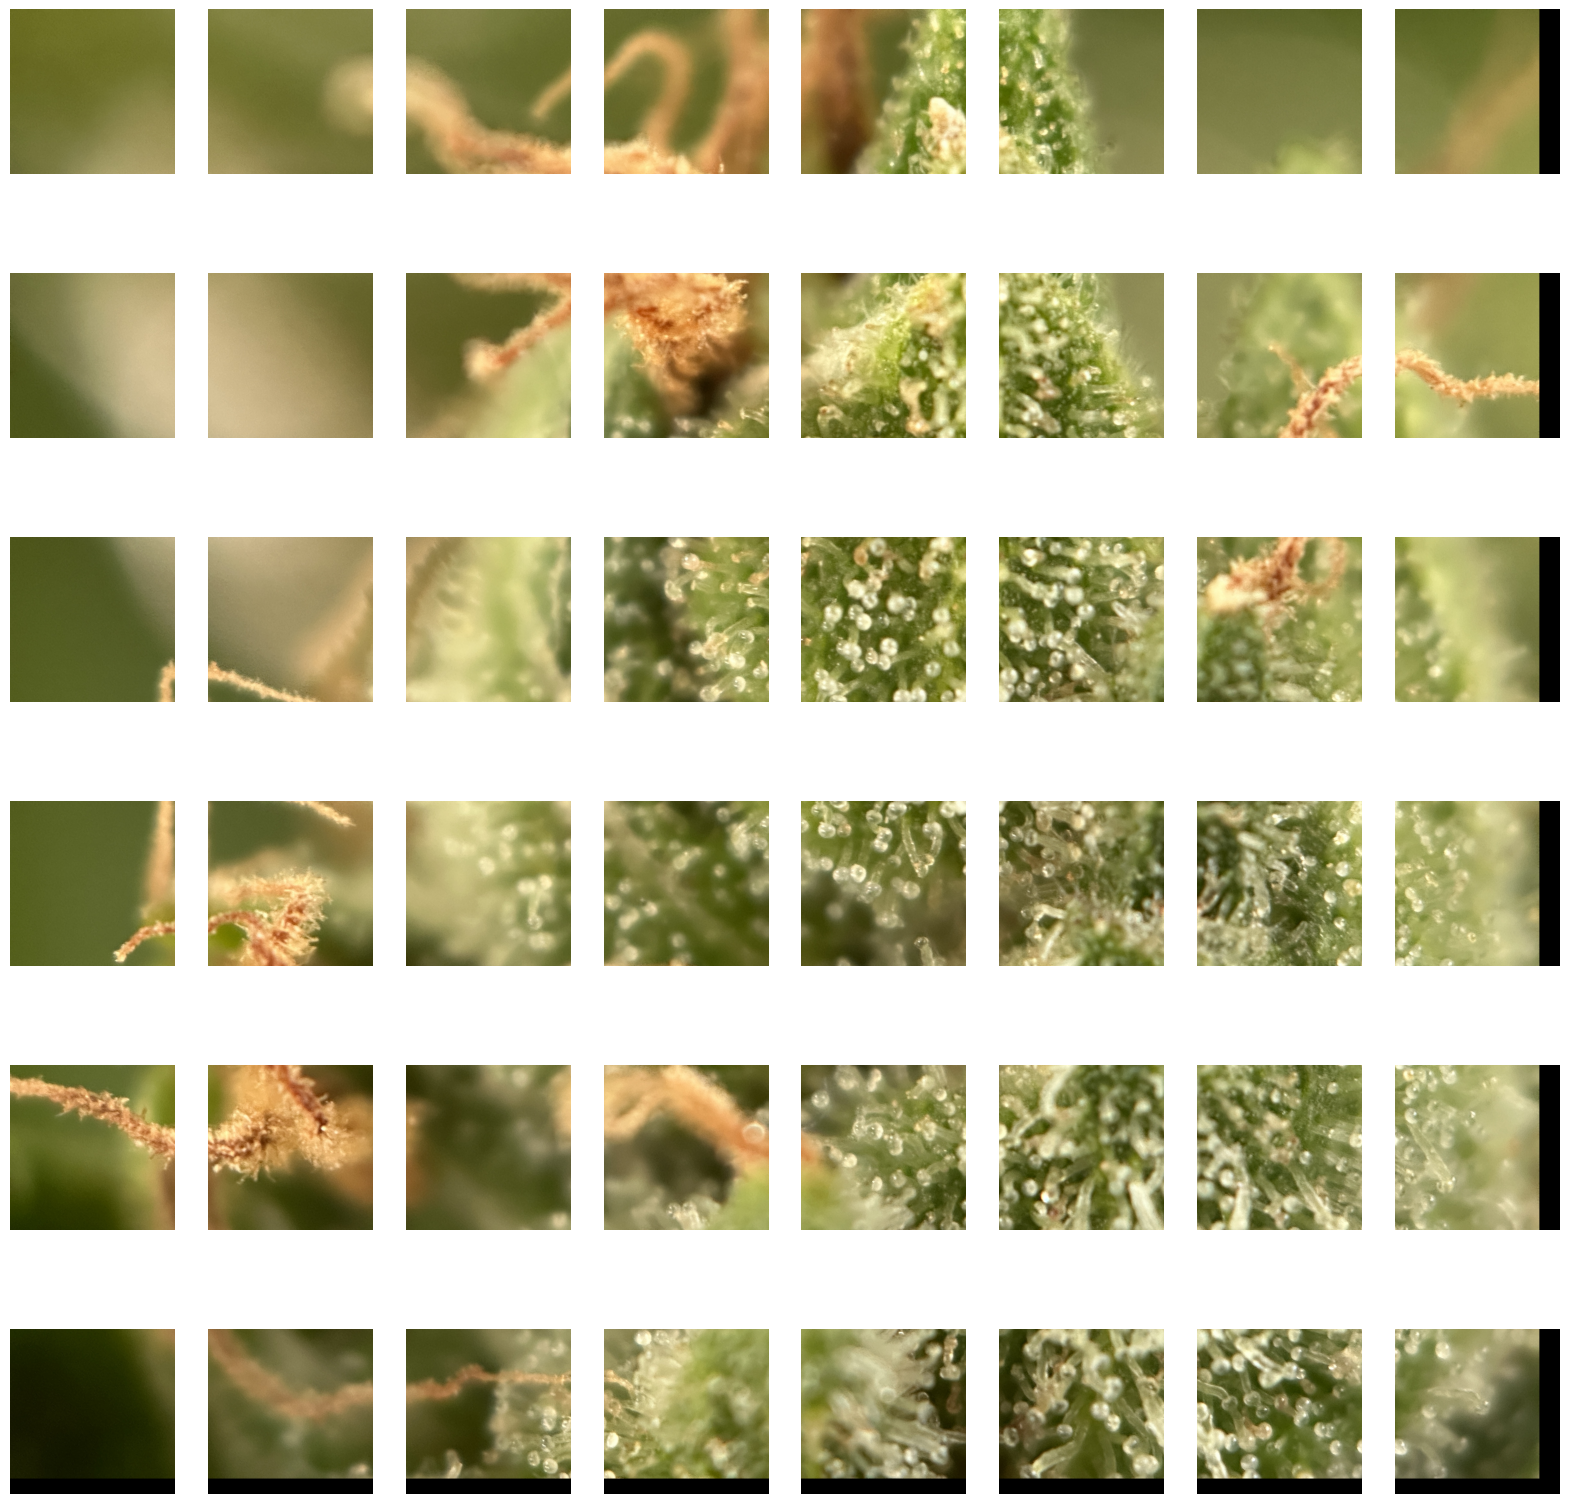

In [38]:
read_and_plot_image("/sise/home/etaylor/images/raw_images/week9_15_06_2023/3x_regular/IMG_2277.JPG")

In [ ]:
#TODO: finish the process of filtering the patches with sharpness that it would not filter the edge patches